Jose Alberto Kaun Sada 
A01720829
Act 4.4 Metaheuresticas

In [4]:
# Importar módulos de customhys: metaheuristic, benchmark_fun, operators
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from customhys import metaheuristic, benchmark_func, operators

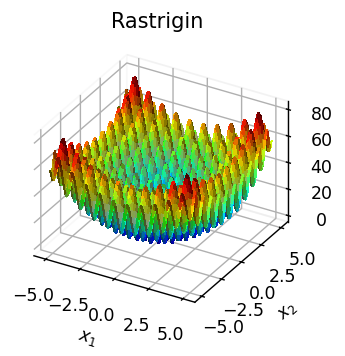

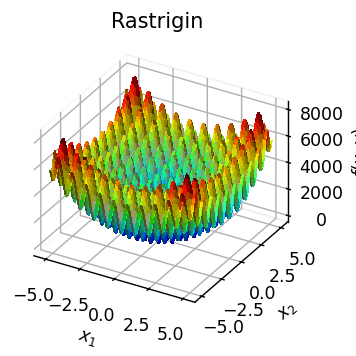

In [41]:
# Definir problema de optimización a resolver
# --- Escoger problema del módulo benchmark_func (e.g. Sphere) y número de dimensiones
rastrigin_func = benchmark_func.Rastrigin(2)
rastrigin_func.plot(samples=100, resolution=125)
plt.show()

rastrigin_func.set_offset_function(-3)
rastrigin_func.set_scale_function(100)

rastrigin_func.plot(samples=100, resolution=125)
plt.show()

In [35]:
# Definir los operadores de la MH
# --- Lista de tuplas, donde cada tupla es un operador (perturbador+selector)
# --- Por ejemplo, para PSO (un solo operador):
# --- --- Perturbador = swarm_dynamic
# --- --- --- Params = factor, self_conf, swarm_conf, version, distribution
# --- --- Selector = all

mh_operators = [
                ('random_search', {'scale': 1.0, 'distribution': 'uniform'}, 'greedy'),
                
                ('genetic_crossover', {'pairing': 'rank', 'crossover': 'single', 'mating_pool_factor': 0.4}, 'all'),

                ('gravitational_search', {'gravity': 1.0, 'alpha': 0.02}, 'probabilistic')]

pso_operators = [('swarm_dynamic', {'factor': 0.7, 'self_conf': 2.54, 'swarm_conf': 2.56, 'version': 'inertial', 'distribution': 'uniform'}, 'all')]


In [36]:
# Crear objeto de MH: problema, parámetros, iteraciones, agentes
sphere_fun = benchmark_func.Sphere(20)
prob = sphere_fun.get_formatted_problem()
prob


{'function': <function customhys.benchmark_func.BasicProblem.get_formatted_problem.<locals>.<lambda>(x)>,
 'boundaries': (array([-100., -100., -100., -100., -100., -100., -100., -100., -100.,
         -100., -100., -100., -100., -100., -100., -100., -100., -100.,
         -100., -100.]),
  array([100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
         100., 100., 100., 100., 100., 100., 100., 100., 100.])),
 'is_constrained': True,
 'features': '111',
 'func_name': 'Sphere',
 'dimensions': 20}

In [37]:
# Configurar output en consola
# Usar MH para resolver el problema (método run)

met = metaheuristic.Metaheuristic(prob, mh_operators, num_iterations=1000)
met.verbose = True
met.run()
print('x_best = {}, f_best = {}'.format(*met.get_solution()))


hist_values = met.historical


Search operators to employ:
random_search(scale=1.0,distribution='uniform') with greedy
genetic_crossover(pairing='rank',crossover='single',mating_pool_factor=0.4) with all
gravitational_search(gravity=1.0,alpha=0.02) with probabilistic
--------------------------------------------------
1
pop. radius: 2.7660375079151556
x_best = [ 67.18149738  72.59759432   6.33215597  -4.60384729  18.975575
  27.04845492  63.41369828 -10.76669508  -3.80542039 -24.77504048
 -31.75438409 -47.09887187  63.31544212 -20.88833715 -28.70462326
 -49.30279948  32.54143786  24.29141212  56.52317197  40.02349813], f_best = 33074.55113432409
2
pop. radius: 2.310002529265496
x_best = [ 59.36975139  60.45702108  13.36213904   7.78823272  18.55192203
  22.30312736  47.8343894   -2.69300844  -1.60953499 -24.49114315
 -26.43263579 -32.01943023  48.10519909 -18.9431458  -24.41120599
 -38.71731575  23.07670286  10.52293321  38.40343246  30.60263824], f_best = 20704.843252911895
3
pop. radius: 1.9808906174467338
x_best 

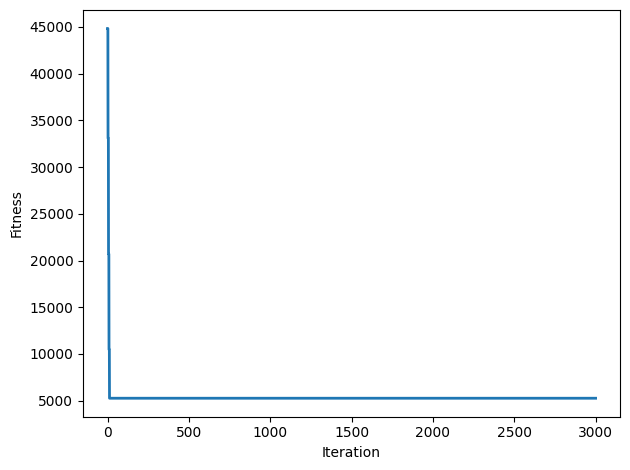

In [38]:
plt.figure()
plt.plot(hist_values['fitness'], lw=2)
plt.xlabel('Iteration'), plt.ylabel('Fitness')
plt.tight_layout()
plt.show()

In [39]:
# Crear objeto de MH: problema, parámetros, iteraciones, agentes
sphere_fun_pso = benchmark_func.Sphere(20)
prob_pso = sphere_fun.get_formatted_problem()
prob_pso

{'function': <function customhys.benchmark_func.BasicProblem.get_formatted_problem.<locals>.<lambda>(x)>,
 'boundaries': (array([-100., -100., -100., -100., -100., -100., -100., -100., -100.,
         -100., -100., -100., -100., -100., -100., -100., -100., -100.,
         -100., -100.]),
  array([100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
         100., 100., 100., 100., 100., 100., 100., 100., 100.])),
 'is_constrained': True,
 'features': '111',
 'func_name': 'Sphere',
 'dimensions': 20}


Search operators to employ:
swarm_dynamic(factor=0.7,self_conf=2.54,swarm_conf=2.56,version='inertial',distribution='uniform') with all
--------------------------------------------------
1
pop. radius: 2.4354610437364865
x_best = [ 42.78775291  20.29523288 -76.0956461  -19.50856374 -44.95663384
  86.62011579  31.8896779   -6.35743848 -70.80182863  19.41042075
 -70.22684204  65.47639987  59.08833425  74.92651014  -9.09588764
 -12.14589154 -37.85765477  17.10539043 -71.88203961 -57.35587171], f_best = 53122.15437356231
2
pop. radius: 3.706948642771832
x_best = [ 42.78775291  20.29523288 -76.0956461  -19.50856374 -44.95663384
  86.62011579  31.8896779   -6.35743848 -70.80182863  19.41042075
 -70.22684204  65.47639987  59.08833425  74.92651014  -9.09588764
 -12.14589154 -37.85765477  17.10539043 -71.88203961 -57.35587171], f_best = 53122.15437356231
3
pop. radius: 3.4504923184254177
x_best = [100.         -10.46782685 -61.52892034  -5.80154256  24.86862742
  30.59824761  27.21808976  20.7

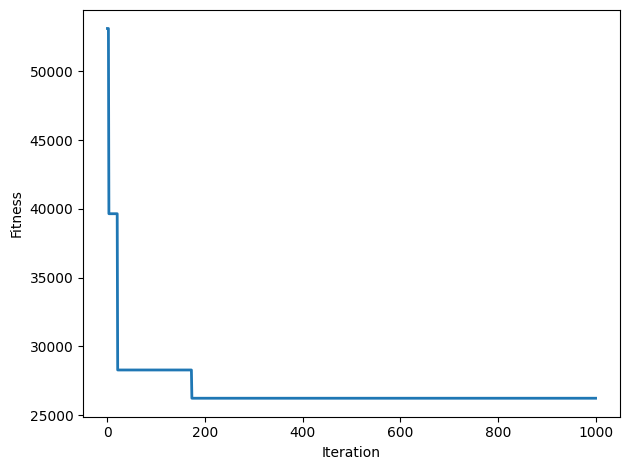

In [40]:
# Configurar output en consola
# Usar MH para resolver el problema (método run)

met_pso = metaheuristic.Metaheuristic(prob, pso_operators, num_iterations=1000)
met_pso.verbose = True
met_pso.run()
print('x_best = {}, f_best = {}'.format(*met_pso.get_solution()))


hist_values_pso = met_pso.historical

plt.figure()
plt.plot(hist_values_pso ['fitness'], lw=2)
plt.xlabel('Iteration'), plt.ylabel('Fitness')
plt.tight_layout()
plt.show()



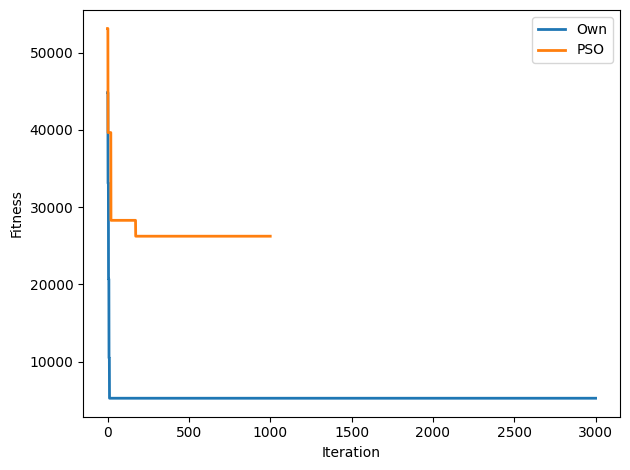

In [47]:
plt.figure()
plt.plot(hist_values['fitness'], lw=2)
plt.plot(hist_values_pso ['fitness'], lw=2)
plt.legend(['Own','PSO'])
plt.xlabel('Iteration')
plt.ylabel('Fitness')
plt.tight_layout()
plt.show()

# **Analisis Final**

De primera vista podemos notar algunas diferencias notables con los dos algoritmos de optimización del problema de la esfera mirando esta gráfica. La línea naranja muestra el PSO, que muestra una disminución significativa en el valor de fitness al inicio. Esto demuestra que PSO encontró rápidamente una zona de alta calidad en el espacio de búsqueda y optimizó la solución desde las primeras iteraciones. Por otro lado, mi algoritmo, la línea azul, también logró una buena mejora al principio, pero su progreso se estabilizó mucho antes que el PSO.

La reducción significativa y precipitada en fitness en las etapas iniciales de la iteración demuestra que el PSO ha mostrado un comportamiento agresivo de convergencia rápida. Es una evidencia de lo eficaz que es el PSO en la localización y explotación rápida de los locales óptimos.
